# INF8460: Traitement automatique de la langue naturelle

# TP1: Comparaison d'algorithmes pour classification de texte

## Identification de l'équipe:

### Groupe de laboratoire: 

### Equipe numéro : 

### Membres: 

- membre 1 (% de contribution, nature de la contribution)
- membre 2 (% de contribution, nature de la contribution)
- membre 3 (% de contribution, nature de la contribution)

* nature de la contribution: Décrivez brièvement ce qui a été fait par chaque membre de l’équipe. Tous les membres sont censés contribuer au développement. Bien que chaque membre puisse effectuer différentes tâches, vous devez vous efforcer d’obtenir une répartition égale du travail. 


## Description:

Dans ce premier TP, vous explorerez les bases du traitement automatique du langage naturel. Au cours de ce travail, vous appliquerez concrètement les concepts enseignés en classe pour résoudre une tâche de classification simple. De plus, le processus ressemblera à la manière dont vous aborderiez ce type de problème dans le monde réel. Tout au long de ce laboratoire, vous vous familiariserez avec des bibliothèques couramment utilisées en NLP ainsi qu'en science des données.

Dans ce laboratoire, vous travaillerez avec un jeu de données comprenant des évaluations de produits provenant d'Amazon. Pour chaque évaluation, le jeu de données contient trois informations : le titre fourni par l'utilisateur, le commentaire détaillé et le nombre d'étoiles attribué par l'utilisateur au produit.

L'objectif de cette tâche consistera à prédire le nombre d'étoiles attribué à une évaluation à partir du commentaire et du titre qui lui sont associés.

Le travail sera divisé en 3 parties:

 - Chargement, prétraitement et visualisation des données: Dans cette première partie, vous allez charger et prétraiter les données afin qu'elles soient prêtes à être utilisées par les algorithmes lors de la deuxième partie.
 - Classification: Cette partie consistera à explorer les différents algorithmes pouvant être appliqués à cette tâche. Vous ferez aussi une analyse des sorties du classificateur bayésien naïf.
 - Amélioration de modèle: Cette dernière partie consistera à améliorer votre modèle de 2 façons différentes. D'abord, vous ferez une recherche d'hyper-paramètres avec de la validation croisée en utilisant un GridSearch. Ensuite, vous ferez de l'extraction d'attributs avec l'aide de ChatGPT afin de d'entrainer un nouveau modèle et de comparer ainsi une représentation de type "Bag of words" et une représentation avec attributs spécifiques. 


## Plan du TP

1.    [Chargement, prétraitement et visualisation des données](#1)
- 1.1   [Charger les données](#1.1)
 - 1.1.1 [Charger le jeu de données](#1.1.1)
 - 1.1.2 [Fusionner les colonnes title et text en une seule colonne](#1.1.2)
- 1.2   [Prétraitement des données](#1.2)
- 1.3   [Visualisation des données](#1.3)
 - 1.3.1 [Afficher dans un graphique le nombre d'exemples présents dans le jeu de données pour chaque catégorie](#1.3.1)
 - 1.3.2 [Afficher dans un graphique la quantité moyenne de jetons par exemple selon la catégorie](#1.3.2)
 - 1.3.3 [Afficher en texte les top 10 jetons les plus fréquents par catégorie](#1.3.3)
 - 1.3.4 [Afficher en texte les top 10 adjectifs les plus fréquents selon la catégorie](#1.3.4)
- 1.4   [Diviser les données en ensembles d'entraînement et de test](#1.4)
- 1.5   [Construction du vocabulaire](#1.5)
- 1.6   [Vectorisation des données](#1.6)
2.    [Classification](#2)
- 2.1   [Modèle aléatoire (Random baseline)](#2.1)
- 2.2   [Analyse et compréhension d'un classificateur bayésien naïf (NB)](#2.2)
 - 2.2.1 [Construction du modèle](#2.2.1)
 - 2.2.2 [Matrice de confusion](#2.2.2)
 - 2.2.3 [Visualisation des probabilités de NB](#2.2.3)
 - 2.2.4 [Visualisation des erreurs commises](#2.2.4)
 - 2.2.5 [Analyse d'erreurs commises](#2.2.5)
- 2.3   [Régression logistique](#2.3)
- 2.4   [MLP](#2.4)
3.    [Amélioration de modèle](#3)
- 3.1   [Recherche d'hyper-paramètres et validation croisée](#3.1)
- 3.2   [Extraction d'attributs (Feature extraction) avec ChatGPT](#3.2)
- 3.3   [Amélioration du modèle en 3.2](#3.3)





<a name='1'></a>
## 1. Chargement, prétraitement et visualisation des données (30 points)

Dans cette première partie, vous allez charger et prétraiter les données afin qu'elles soient prêtes à être utilisées par les algorithmes lors de la deuxième partie.

<a name='1.1'></a>
### 1.1 Charger les données  (2 points)

Ce numéro doit être résolu en utilisant la bibliothèque **pandas**.

<a name='1.1.1'></a>
#### 1.1.1 Charger le jeu de données (1 point)

Chargez le jeu de données amazon_rating.csv. Affichez ensuite son contenu.


In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("amazon_rating.csv")
data

,title,text,rating
0,Five Stars,good as any name brand,5
1,Did The Job,Ordered on accident when I had searched for RE...,3
2,Great product,I was looking for something to read on and thi...,5
3,Leaking Acid EVERYEWHERE!!,After 2nd recharge and use all but 3 are leaki...,1
4,One Star,They fail earlier than brand names. I assumed ...,1
...,...,...,...
2788,Three Stars,Weird but some didn't last long as they should,3
2789,Good for kids but SLOW,"A good starter tablet, but very very slow. Don...",3
2790,good tablet to star,is a God tablet but the camera could be a litt...,3
2791,Just decent tablet,Not many apps. The first one was already retur...,3


<a name='1.1.2'></a>
#### 1.1.2 Fusionner les colonnes title et text en une seule colonne (1 point)

Afin de faciliter la tâche pour le reste du TP, nous allons fusionner ces deux colonnes afin que nous n'ayons qu'un seul texte à considérer lors de la vectorisation.

Afin de s'assurer de l'intégrité des textes, fusionnez-les à l'aide d'un espace. Par exemple, une évaluation ayant le titre "Five Stars" et le commentaire "good as any name brand" aura comme texte final "Five Stars good as any name brand".

Stockez le résultat dans la colonne "text" et supprimez la colonne "title".

In [3]:
data["text"] = data["title"] + " " + data["text"]
data = data.drop(columns=["title"])
data

,text,rating
0,Five Stars good as any name brand,5
1,Did The Job Ordered on accident when I had sea...,3
2,Great product I was looking for something to r...,5
3,Leaking Acid EVERYEWHERE!! After 2nd recharge ...,1
4,One Star They fail earlier than brand names. I...,1
...,...,...
2788,Three Stars Weird but some didn't last long as...,3
2789,"Good for kids but SLOW A good starter tablet, ...",3
2790,good tablet to star is a God tablet but the ca...,3
2791,Just decent tablet Not many apps. The first on...,3


<a name='1.2'></a>
### 1.2 Prétraitement des données (4 points)

En utilisant la librairie nltk, implémentez la fonction suivante qui :

- Enlève les majuscules.
- Enlève les caractères de ponctuation.
- Segmente la séquence en entrée en une liste de jetons (tokenization).
- Enlève les "stopwords"
- Effectue la racinisation.
- Retourne l'ensemble des jetons de la séquence
    

In [4]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import re

stopwords = stopwords.words('english')
stemmer = nltk.stem.porter.PorterStemmer()
#lemmer = nltk.stem.wordnet.WordNetLemmatizer()


def preprocess(sentence):
    """
    Fonction qui transforme une chaine de caractère en liste de jetons.
    Les pre-traitements à implémenter sont: 
    1. Enlever les majuscules
    2. Enlever les caractères de ponctuations
    3. Séparer la chaine de caractères en une liste de jetons (tokenization) 
    4. Enlever les stopwords
    5. Stemming (racinisation)
    
    :param sentence: une chaine de caractère
    :return: la liste de jetons
    """ 
    
    # Enlever les majuscules
    sentence = sentence.lower()

    # Enlever les caractères de ponctuations
    sentence = re.sub(r'[^\w\s]', '', sentence)

    # Séparer la chaine de caractères en une liste de jetons (tokenization)
    tokens = word_tokenize(sentence)

    # Enlever les stopwords
    tokens = {token for token in tokens if token not in stopwords}

    # Stemming (racinisation)
    tokens = [stemmer.stem(token) for token in tokens]
    
    return tokens

In [5]:
"""
NE PAS MODIFIER

Le code suivant appliquera votre fonction sur tous les exemples. Il gardera aussi une version originale pour une analyse future.
"""

data["text_original"] = data["text"]
data["text"] = data["text"].apply(preprocess)


<a name='1.3'></a>
### 1.3 Visualisation des données (15 points)

**Utilisez la bibliothèque matplotlib pour les graphiques.** Vous pouvez utiliser n'importe quelle classe de base de Python, par exemple collections.Counter, qui sera utile pour l'affichage des jetons.

La colonne "rating" contient le nombre d'étoiles associé à l'évaluation d'un utilisateur. Le nombre d'étoiles varie entre 1 et 5.

Afin de simplifier la tâche de classification, nous avons enlevé les commentaires ayant 2 et 4 étoiles du jeu de données. Cela signifie qu'il y a trois catégories de commentaires, c'est-à-dire ceux ayant 1, 3 ou 5 étoiles.

Affichez dans un graphique :

- Le nombre d'exemples présents dans le jeu de données par catégorie.
- La quantité moyenne de jetons par exemple selon la catégorie.


<a name='1.3.1'></a>
#### 1.3.1  Afficher dans un graphique le nombre d'exemples présents dans le jeu de données pour chaque catégorie  (3 points)

In [6]:
import matplotlib.pyplot as plt

<Axes: xlabel='rating'>

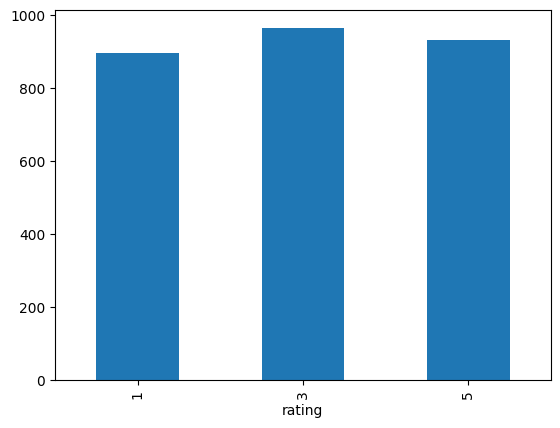

In [7]:
# group by rating and count the number of examples
data.groupby("rating").count().plot(kind="bar", y="text", legend=False)


<a name='1.3.2'></a>
#### 1.3.2 Afficher dans un graphique le nombre moyen de jetons dans les exemples de chaque catégorie (4 points)

<Axes: xlabel='rating'>

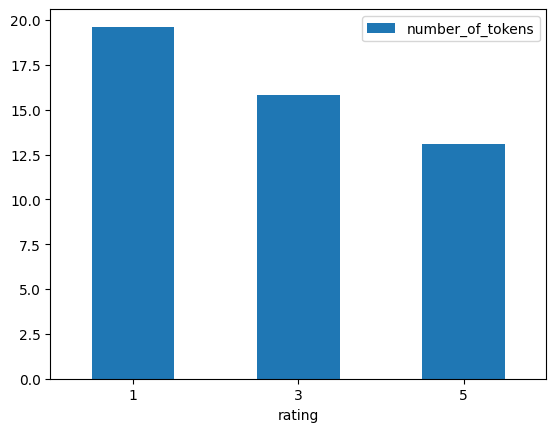

In [8]:
# group by rating and get mean of "number_of_tokens"
data["number_of_tokens"] = data["text"].apply(len)
data.groupby("rating").mean("number_of_tokens").plot(kind="bar", y="number_of_tokens", legend=True, rot=0)

<a name='1.3.3'></a>
#### 1.3.3 Afficher en texte les top 10 des jetons les plus fréquents par catégorie (4 points)


Affichez en texte les 10 jetons les plus fréquents selon la catégorie.


In [9]:
from collections import Counter

# groupby category and get the top 10 most frequent tokens

# groupby category and merge lists
top_words_df = data[["text", "rating"]].groupby("rating").sum().reset_index()

# get the top 10 most frequent tokens as a word chart
top_words_df["top"] = top_words_df ["text"].apply(lambda x: Counter(x).most_common(10))

top_words_df

,rating,text,top
0,1,"[3, leak, ruin, 2nd, fluid, acid, everyewher, ...","[(batteri, 597), (last, 310), (one, 295), (use..."
1,3,"[fault, made, less, put, amazon, guard, free, ...","[(batteri, 278), (good, 262), (tablet, 249), (..."
2,5,"[brand, five, star, good, name, life, work, fi...","[(great, 458), (love, 262), (batteri, 254), (t..."


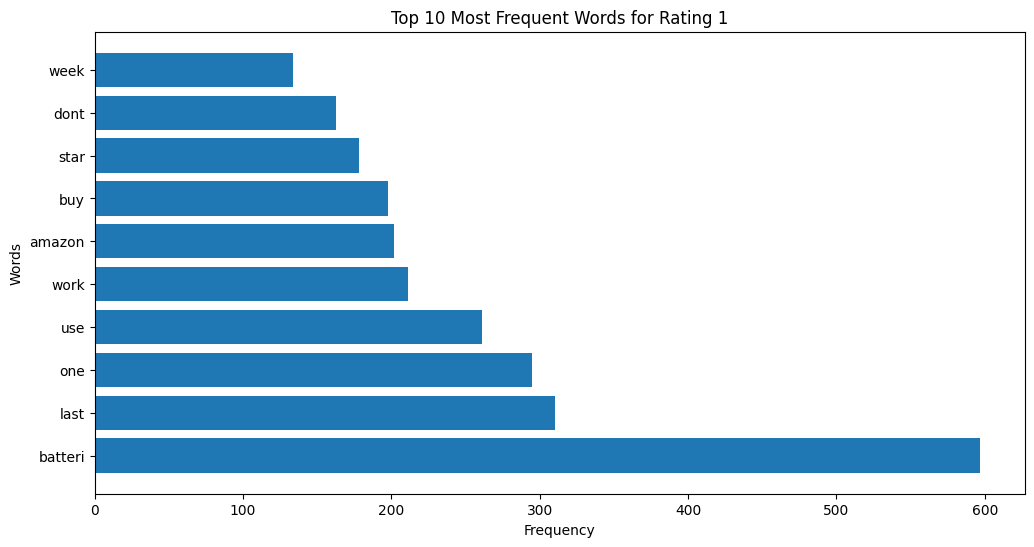

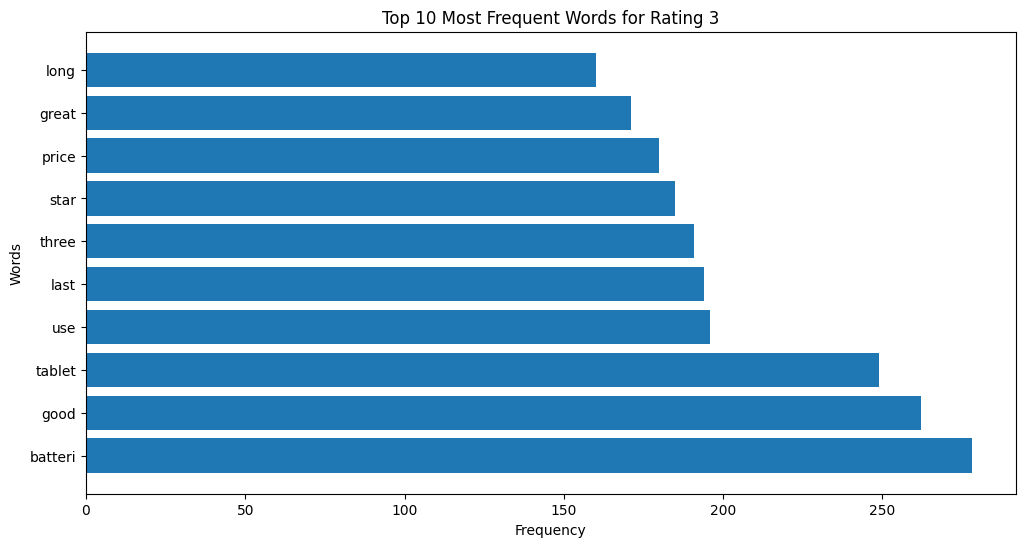

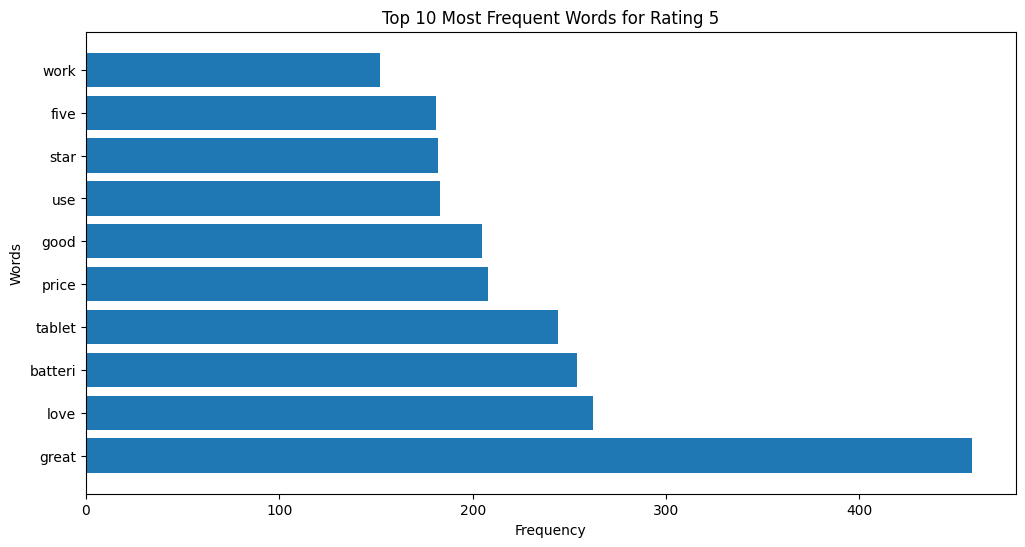

In [10]:

for index, row in top_words_df.iterrows():
    words, frequencies = zip(*row['top'])  # Unpack tuple into separate lists
    plt.figure(figsize=(12, 6))
    plt.barh(words, frequencies)
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.title(f"Top 10 Most Frequent Words for Rating {row['rating']}")
    plt.show()


<a name='1.3.4'></a>
#### 1.3.4 Afficher en texte les top 10 des adjectifs les plus fréquents selon la catégorie (4 points)

Pour cet exercice, vous devrez utiliser la fonction [nltk.pos_tag](https://www.nltk.org/book/ch05.html) et retenir les jetons identifiés comme JJ.
 
Pour obtenir de bons résultats, le tagger [nltk.pos_tag](https://www.nltk.org/book/ch05.html) doit être exécuté sur le texte original, incluant les stopwords. 
Vous devrez donc partir des évaluations originales. Pour vous simplifier la tâche, utilisez 
le tokenizer *word_tokenize* provenant de nltk.

**Les adjectifs sont les jetons identifiés comme JJ.**

In [46]:
from nltk.tokenize import word_tokenize
from nltk import pos_tag

# nltk.download('averaged_perceptron_tagger')

data["tag"] = data["text_original"].apply(lambda x: pos_tag(word_tokenize(x)))
data["adjectives"] = data["tag"].apply(lambda x: [word for word, tag in x if tag.startswith('JJ')])
data["adjectives"]

0                                        [good]
1                                 [happy, free]
2       [right, screen, good, great, nice, Big]
3                                   [corrosive]
4                                     [earlier]
                         ...                   
2788                                     [last]
2789             [Good, good, slow, true, fine]
2790                     [good, little, better]
2791        [decent, many, first, second, fine]
2792                               [last, long]
Name: adjectives, Length: 2793, dtype: object

In [47]:
top_adjectives_df = data[["adjectives", "rating"]].groupby("rating").sum().reset_index()
top_adjectives_df["top"] = top_adjectives_df ["adjectives"].apply(lambda x: Counter(x).most_common(10))
top_adjectives_df

,rating,adjectives,top
0,1,"[corrosive, earlier, regular, bad, less, last,...","[(last, 259), (good, 102), (dead, 95), (other,..."
1,3,"[happy, free, okay, smaller, lighter, original...","[(good, 238), (last, 201), (great, 132), (Good..."
2,5,"[good, right, screen, good, great, nice, Big, ...","[(great, 260), (good, 175), (old, 90), (easy, ..."


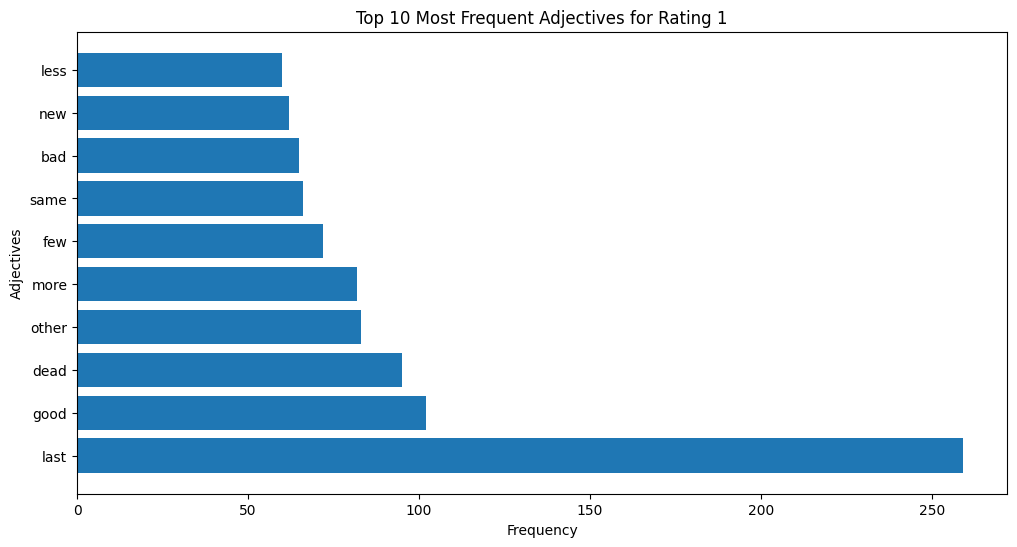

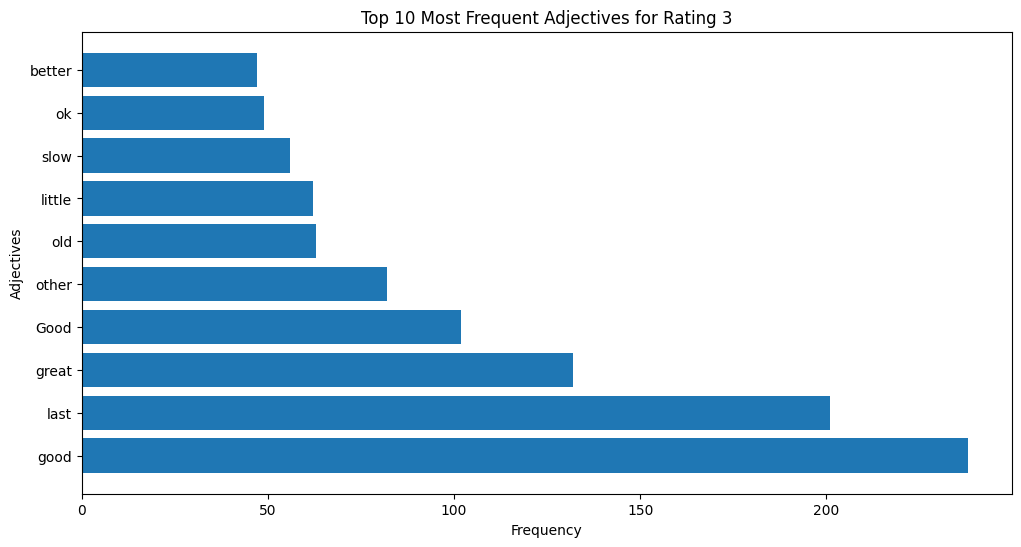

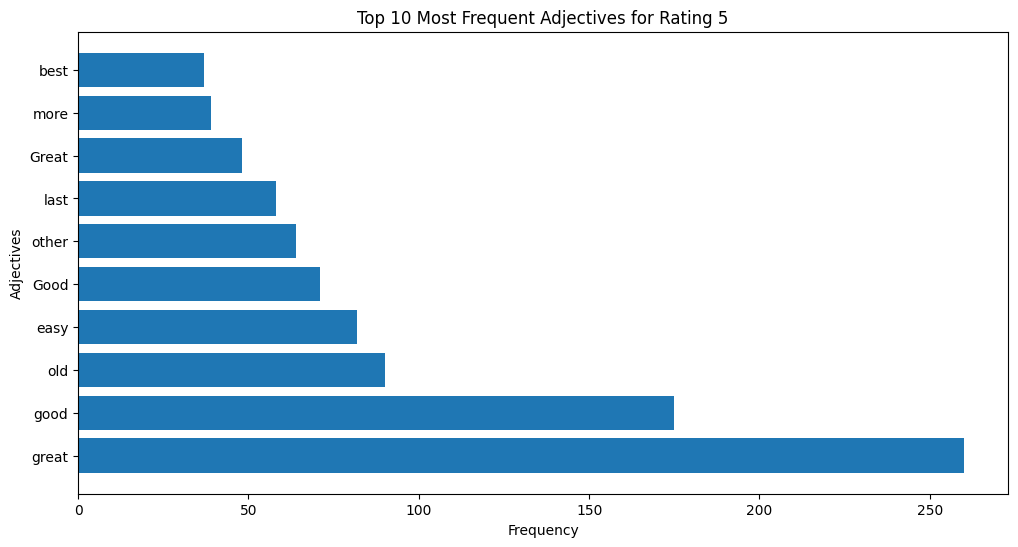

In [48]:
for index, row in top_adjectives_df.iterrows():
    adjectives, frequencies = zip(*row['top'])  # Unpack tuple into separate lists
    plt.figure(figsize=(12, 6))
    plt.barh(adjectives, frequencies)
    plt.xlabel('Frequency')
    plt.ylabel('Adjectives')
    plt.title(f"Top 10 Most Frequent Adjectives for Rating {row['rating']}")
    plt.show()
    

<a name='1.4'></a>
### 1.4 Diviser les données en ensembles d'entraînement et de test (1 point)

À l'aide de la fonction [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) de SKlearn, séparez les données en ensembles d'entraînement (67% des données) et de test (33% des données). Gardez les deux ensembles dans 2 variables.

In [14]:
from sklearn.model_selection import train_test_split

X, y = data["text"], data["rating"]
X_original, y_original = data["text_original"], data["rating"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(X_original, y_original, test_size=0.33, random_state=0)


<a name='1.5'></a>
### 1.5 Construction du vocabulaire (4 points)

Dans un modèle Bag-of-Words (BoW), un vocabulaire est prédéterminé à partir de l'ensemble d'entraînement. Seuls les mots faisant partie de ce vocabulaire seront considérés pour la suite.

Complétez la fonction **build_voc** qui retourne une liste de jetons qui sont présents au moins n fois (threshold passé en paramètre) dans la liste d'exemples (également passée en paramètre). Vous pouvez utiliser la classe Counter.

Ensuite, appelez cette fonction pour construire votre vocabulaire.

In [15]:

def build_voc(documents, threshold):
    
    token_counts = Counter(documents) 
    vocabulary = [token for token, count in token_counts.items() if count >= threshold]

    return vocabulary

# concat all the tokens in the training set
all_tokens = []
for token_lists in X_train:
    all_tokens += token_lists

# build the vocabulary
vocabulary = build_voc(all_tokens, 10)
len(vocabulary)

555

<a name='1.6'></a>
### 1.6 Vectorisation des données (4 points)

À l'aide de la classe [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) de Sklearn, transformez l'ensemble de jetons en matrice de co-occurence utilisant TF-IDF.

Utilisez le vocabulaire construit au numéro précédent dans votre matrice de co-occurrence (voir le paramètre vocabulary de TfidfVectorizer). 

**Faites attention:** Il ne faut pas entrainer (fit) la vectorisation sur l'ensemble de test

In [16]:
X_train

1804              [energi, deal, three, star, quick, ran]
684                       [okay, three, long, star, last]
300     [work, much, doesnt, everyth, toy, electron, b...
861                              [work, star, five, well]
128     [much, differ, like, love, life, galaxi, one, ...
                              ...                        
763     [brand, like, couch, certain, beg, critic, aa,...
835     [decent, quickli, ton, crap, price, batteri, d...
1653    [run, robot, power, muahahahahaha, need, armi,...
2607    [deal, time, packag, manner, great, ship, awesom]
2732    [get, mine, gift, 3, differ, year, kerplot, ne...
Name: text, Length: 1871, dtype: object

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(vocabulary=vocabulary)

X_train_str = [" ".join(tokens) for tokens in X_train]
X_train_tfidf = vectorizer.fit_transform(X_train_str)

pd.DataFrame(X_train_tfidf.toarray(), columns=vectorizer.get_feature_names_out())


,deal,three,star,quick,ran,okay,long,last,work,much,...,handi,email,overal,faster,brows,fact,gave,birthday,shop,husband
0,0.432079,0.326529,0.246567,0.560388,0.57607,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.434325,0.327965,0.000000,0.00000,0.663737,0.387740,0.336023,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.246252,0.353452,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.402216,0.000000,0.00000,0.000000,0.000000,0.000000,0.430467,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.095631,0.137262,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1866,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.186866,0.161942,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1867,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1868,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1869,0.417223,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<a name='2'></a>
## 2. Classification (35 points)

Maintenant que les données sont prêtes à être utilisées par nos modèles, nous allons entrainer et tester différent types de modèles sur le jeu de données afin d'en faire la comparaison. 

Cette section sera divisé en cinq modèle:
   - Modèle aléatoire (Random baseline)
   - Classificateur bayésien naïf
   - Régression Logistique
   - Multi-Layer Perceptron (MLP)

<a name='2.1'></a>
### 2.1 Modèle aléatoire (Random baseline) (5 points)

Un seuil (baseline) est un modèle servant de référence et dont les performances représentent un seuil à dépasser.

#### a) Générez ce seuil en effectuant des prédictions aléatoires parmi les valeurs 1, 3 et 5. Ensuite, affichez les mesures de performance : précision, rappel (recall) et F1. Utilisez la classe classification_report de SKlearn et affichez 4 chiffres après la virgule. (3.5 points)

In [18]:
import numpy as np
classes = np.unique(y_train)
y_random = np.random.choice(classes, size=len(y_test))

In [19]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_random))

              precision    recall  f1-score   support

           1       0.32      0.31      0.31       311
           3       0.32      0.30      0.31       310
           5       0.34      0.38      0.36       301

    accuracy                           0.33       922
   macro avg       0.33      0.33      0.33       922
weighted avg       0.33      0.33      0.33       922



#### b) Comment pouvez-vous expliquer le F1-score obtenu? (1.5 points)

In [20]:
class_distribution = Counter(y_test)
classes = list(class_distribution.keys())
probabilities = [class_distribution[c] / len(y_test) for c in classes]
probabilities

[0.3362255965292842, 0.33731019522776573, 0.3264642082429501]

> Dans de notre data set on peut voir que les données sont balancées donc en choissant hazard nous auront une 'accuracy' d'environ 33%. La précision pour chaque classe sera données par TP /(TP + FP). Pour chaque classe TP sera environ égal à 0.33²/(0.33² + 0.33 - 0.33²) = 0.33. Ceci s'explique par le fait que la classe en question est présente dans un ratio de 0.33 et lorsqu'on fait la prédiction de celle ci il y a 0.33 de probabilité d'avoir choisit la bonne classe donc TP est 0.33². FP peut se calculé avec 0.33 - 0.33² puisque on va choisir la classe en question avec 0.33 de probabilité et que 0.33² de ces fois seront des TP. Ensuite le Recall peut être calculer d'une facon similaire et nous obtenons 0.33 aussi. Le f1 score théorique sera donc 2*0.33*0.33/(0.66) = 0.33. Ce qui est similaire au résultat obtenu.

<a name='2.2'></a>
### 2.2 Analyse et compréhension d'un classificateur bayésien naïf (NB) (22 points)

Naive Bayes (NB) est un algorithme très simple pouvant servir de bon point de départ (baseline) pour les tâches de classification. Ce numéro portera sur l'analyse de ce modèle afin de bien comprendre son comportement.

<a name='2.2.1'></a>
#### 2.2.1 Construction du modèle (4 points)

Commencez d'abord par construire le modèle à l'aide de la classe MultinomialNB de SKlearn. Utilisez les données vectorisées produites en 1.6.

Affichez les performances de votre classificateur (précision, recall, F1-score).

In [21]:
from sklearn.naive_bayes import MultinomialNB

In [22]:
X_test

1533                                [star, three, expect]
2392    [electr, abysm, differ, result, brand, life, e...
502         [work, enjoy, lot, loud, enough, use, awesom]
1515                                  [star, five, great]
1858    [son, faulti, headset, five, well, cabl, star,...
                              ...                        
1129    [leak, light, duracellslast, fixtur, tend, fiv...
2180    [tell, three, cant, star, good, duracel, reall...
254     [brand, amazon, price, afford, batteri, good, ...
2218    [pro, annoy, one, cheap, someth, bought, littl...
895     [get, batterei, after2, higher, brand, remot, ...
Name: text, Length: 922, dtype: object

In [23]:
clf_nb = MultinomialNB()
clf_nb.fit(X_train_tfidf, y_train)

X_test_tfidf = vectorizer.transform([" ".join(tokens) for tokens in X_test])
y_nb_pred = clf_nb.predict(X_test_tfidf)

print(classification_report(y_test, y_nb_pred))

              precision    recall  f1-score   support

           1       0.77      0.81      0.79       311
           3       0.71      0.66      0.68       310
           5       0.81      0.83      0.82       301

    accuracy                           0.77       922
   macro avg       0.76      0.77      0.76       922
weighted avg       0.76      0.77      0.76       922



<a name='2.2.2'></a>
####  2.2.2 Matrice de confusion (3 points)

Visualisez la matrice de confusion de votre modèle en utilisant la fonction [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) de seaborn. Celle-ci peut prendre en entrée une matrice de confusion comme celle fournie par la fonction [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) dans SKLearn.

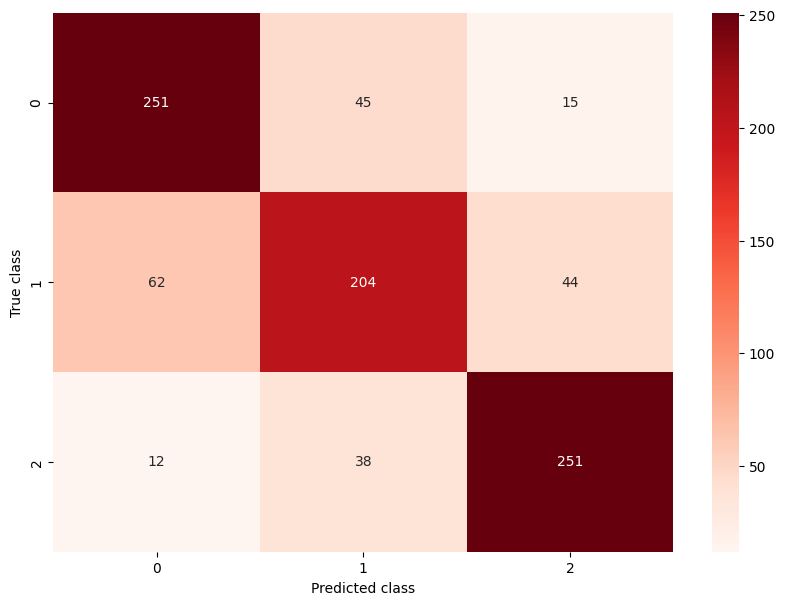

In [24]:
from sklearn.metrics import confusion_matrix
from seaborn import heatmap

cm = confusion_matrix(y_test, y_nb_pred)

plt.figure(figsize=(10,7))
heatmap(cm, annot=True, fmt='g', cmap='Reds')
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.show()

<a name='2.2.3'></a>
####  2.2.3 Visualisation des probabilités de NB (5 points)

Naive Bayes est un classificateur suivant une approche générative. Durant son entraînement, il apprend les probabilités P(x_i|y). En utilisant le théorème de Bayes, on peut exprimer la probabilité d'une classe donnée y étant donné un ensemble de caractéristiques x_1, x_2, ..., x_n comme suit : 

$$ P(y|x_1, x_2, ..., x_n) = P(y) * P(x_1|y) * P(x_2|y) * ... * P(x_n|y) $$

Ainsi, étant donné un exemple ayant le jeton x_i, plus la probabilité P(x_i|y) est élevée pour une classe, plus la probabilité que l'exemple provienne de cette classe augmente.

Écrivez du code permettant de visualiser les jetons ayant les plus grandes probabilités selon la classe dans un graphique de type [barh](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.barh.html). Consultez la documentation de [MultiNomialNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) afin de trouver les probabilités P(x_i|y). Le graphique produit devrait montrer, sur l'axe des Y, les 10 jetons associés au P(x_i|y) le plus grand selon y. L'axe des X devrait représenter la valeur des probabilités.

Ce code devra être sous forme d'une fonction où on passe la classe y en paramètre.


In [25]:
X_train_tfidf.toarray()

array([[0.43207903, 0.32652938, 0.24656718, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.43432474, 0.32796506, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41722261, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [26]:
pd.DataFrame(X_train_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

,deal,three,star,quick,ran,okay,long,last,work,much,...,handi,email,overal,faster,brows,fact,gave,birthday,shop,husband
0,0.432079,0.326529,0.246567,0.560388,0.57607,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.434325,0.327965,0.000000,0.00000,0.663737,0.387740,0.336023,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.246252,0.353452,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.402216,0.000000,0.00000,0.000000,0.000000,0.000000,0.430467,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.095631,0.137262,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1866,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.186866,0.161942,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1867,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1868,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1869,0.417223,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
import matplotlib.pyplot as plt

def plot_top_features(clf, vectorizer, class_label, top_n=10, token_filter=[]):
    """
    Plot the top N features for a given class based on their probabilities.
    
    Parameters:
        clf (classifier): Trained Naive Bayes classifier
        vectorizer (TfidfVectorizer): The vectorizer instance
        class_label (int): The class label (1, 3, or 5 in your case)
        top_n (int): Number of top features to plot. Default is 10.
    """

    nb_probabilities = np.exp(clf.feature_log_prob_)
    classes = clf.classes_

    feature_prob_df = pd.DataFrame(nb_probabilities, columns=vectorizer.get_feature_names_out())
    if token_filter:
        feature_prob_df = feature_prob_df.loc[:, feature_prob_df.columns.isin(token_filter)]

    feature_prob_df = feature_prob_df.T
    feature_prob_df.columns = classes
    
    feature_prob_df[class_label].sort_values().tail(top_n).plot(kind='barh')
    
    plt.xlabel('Probability')
    plt.ylabel('Feature')
    plt.title(f'Top {top_n} Features for Class {class_label}')
    
    plt.show()
    

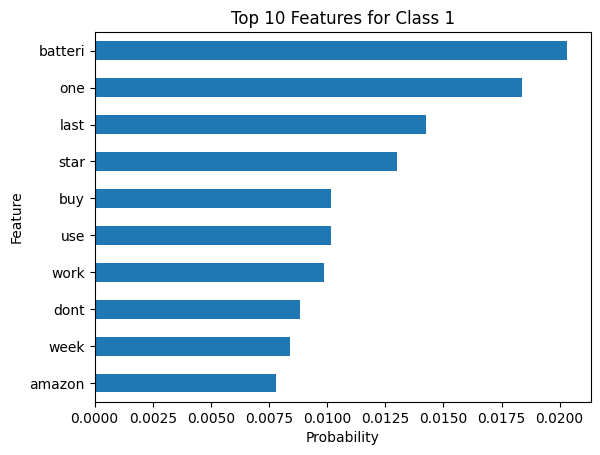

In [28]:
plot_top_features(clf_nb, vectorizer, 1, 10)

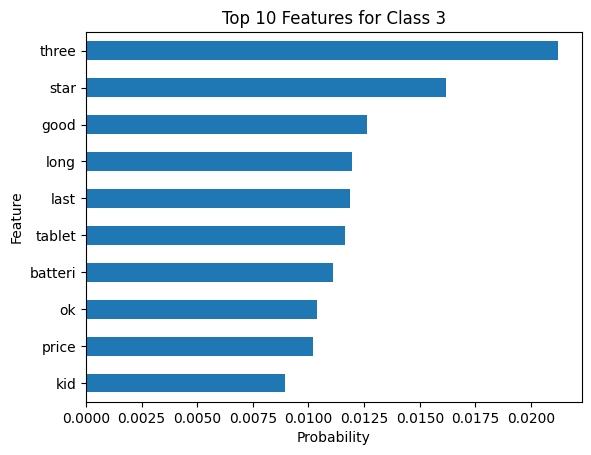

In [29]:
plot_top_features(clf_nb, vectorizer, 3, 10)

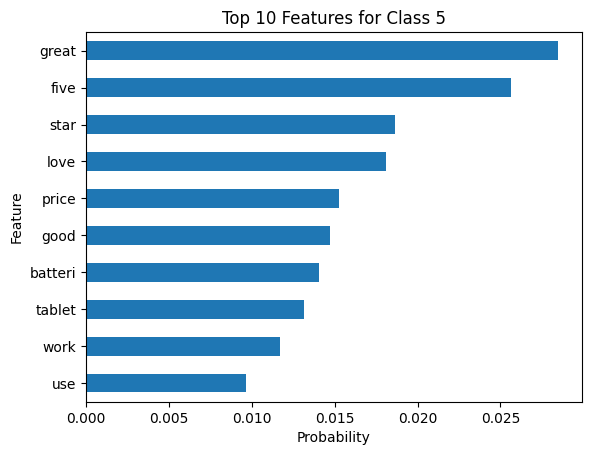

In [30]:
plot_top_features(clf_nb, vectorizer, 5, 10)

Que pouvez-vous remanquer à propos des jetons affichés dans le graphique?

> Il semble que beaucoup de commentaire contiennent le nombre d'étoiles données au produits par example les chiffres 'one', 'three' et 'five' sont de bons indicateurs pour catégoriser le commentaires dans la bonne classes. De plus il semble y avoir une similarité entre les probabilités des jetons selon les ratings et le top 10 des jetons les plus courrants selon le rating.

<a name='2.2.4'></a>
#### 2.2.4 Visualisation des erreurs commises  (3 points)

Trouvez toutes les phrases dont la vraie valeur est 5 mais la valeur prédite est de 1.

Affichez ces exemples d'une manière lisible.


In [31]:
result_df = pd.DataFrame({'y_test': y_test, 'y_nb_pred': y_nb_pred, 'X_test': X_test})

# Filter rows where y_test is 5 and y_nb_pred is 1
filtered_result = result_df[(result_df['y_test'] == 5) & (result_df['y_nb_pred'] == 1)]

# %pip install ipython
from IPython.display import display, HTML

# Combine the words in each sentence
filtered_result = filtered_result.copy()
filtered_result['sentence'] = filtered_result['X_test'].apply(lambda x: ' '.join(x))

# Create an HTML string
html_str = '<h3>Filtered Rows (y_test: 5, y_nb_pred: 1)</h3><ul>'

for sentence in filtered_result['sentence']:
    html_str += f'<li>{sentence}</li>'

html_str += '</ul>'

display(HTML(html_str))

In [32]:
filtered_result

,y_test,y_nb_pred,X_test,sentence
33,5,1,"[need, work, remot, best, part, charg, electro...",need work remot best part charg electron pack ...
676,5,1,"[sword, attack, life, ranger, one, carri, add,...",sword attack life ranger one carri add attack ...
385,5,1,"[enough, never, stock]",enough never stock
1895,5,1,"[super, strong, plenti, fine, case, pocket, fa...",super strong plenti fine case pocket fab anoth...
1161,5,1,"[work, amazonbas, aaa, alkalin, unbeliev, perf...",work amazonbas aaa alkalin unbeliev perform ba...
1230,5,1,"[problem, sale, one, stylu, cheap, tablet, lit...",problem sale one stylu cheap tablet littl card...
526,5,1,"[work, like, product, time, love, work, rule, ...",work like product time love work rule charm bo...
149,5,1,"[wireless, mous, high, typic, flashlight, batt...",wireless mous high typic flashlight batteri us...
588,5,1,"[tell, week, anymor]",tell week anymor
2200,5,1,"[like, know, hesit, especi, anyth, go, perform...",like know hesit especi anyth go perform price ...


<a name='2.2.5'></a>
#### 2.2.5 Analyse d'erreurs commises (7 points)

Complétez la fonction plot_example qui:
   - Prend en entrée une liste de jetons provenant d'un exemple. 
   - Produit un graphique qui pour chaque jeton, affiche la valeur P(x_i|y=5) et P(x_i|y=1)
    
**Pour vous faciliter le travail, utiliser barh de pandas et non de matplotlib**: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.barh.html


#### a) Exécutez votre fonction avec une phrase au choix dont la vraie valeur est 5 mais la valeur prédite est de 1. (4 points)

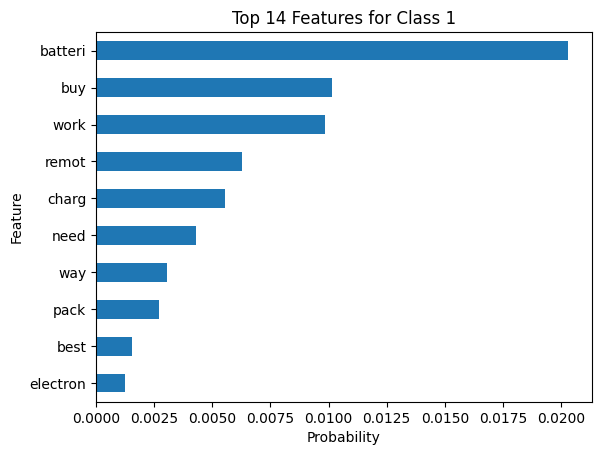

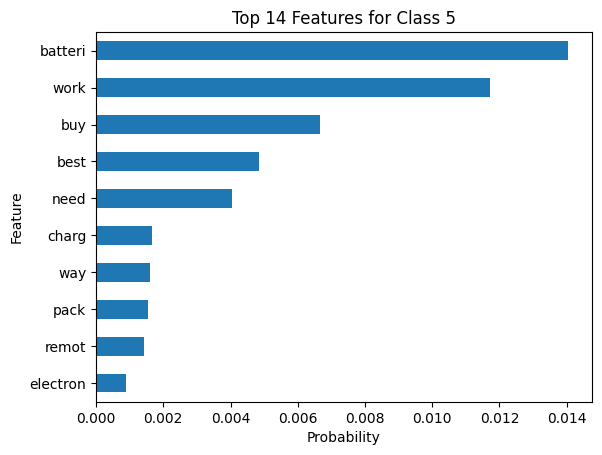

In [33]:
def plot_example(tokens):
    plot_top_features(clf_nb, vectorizer, 1, len(tokens), tokens)
    plot_top_features(clf_nb, vectorizer, 5, len(tokens), tokens)
plot_example(filtered_result['X_test'].iloc[0])

#### b) Suite à cette analyse, pouvez-vous voir une tendance dans les exemples qui sont prédits comme faisant partie de la classe 1 mais faisant réellement partie de la classe 5 ?  (3 points)

In [34]:
# Proportion des phrase mal identifié à 1 lorsque la vrai classe est 5 qui contienne le token batteri
contains_batteri = filtered_result['X_test'].apply(lambda x: 'batteri' in x)
proportion_containing_batteri = contains_batteri.mean()

print(f"Proportion of rows containing 'batteri': {proportion_containing_batteri:.2f}")

Proportion of rows containing 'batteri': 0.67


> Il semble que le jeton batteri soit principalement responsable de la confusion du model puisque ce jeton a la plus grande probabilité P(x_i|y=1). Environ 70% de ces phrases mal identifié contiennent le mot batteri.

<a name='2.3'></a>
### 2.3 Régression logistique (4 points)

Entrainez un modèle de [régression logistique](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) à l'aide de SKLearn en utilisant les données produites en 1.6 et affichez sa performance avec les mêmes métriques que précédemment. 

In [35]:
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression()
clf_lr.fit(X_train_tfidf, y_train)

y_lr_pred = clf_lr.predict(X_test_tfidf)


In [36]:
print(classification_report(y_test, y_lr_pred))

              precision    recall  f1-score   support

           1       0.82      0.86      0.84       311
           3       0.74      0.74      0.74       310
           5       0.84      0.79      0.82       301

    accuracy                           0.80       922
   macro avg       0.80      0.80      0.80       922
weighted avg       0.80      0.80      0.80       922



<a name='2.4'></a>
### 2.4 MLP (4 points)

Entrainez un modèle neuronal de type [Multi-layer Perceptron classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) à l'aide de SKLearn en utilisant les données produites en 1.6. Affichez sa performance avec les mêmes métriques que précédemment. 

In [37]:
from sklearn.neural_network import MLPClassifier

clf_nn = MLPClassifier(max_iter=1000)
clf_nn.fit(X_train_tfidf, y_train)

y_nn_pred = clf_nn.predict(X_test_tfidf)

In [38]:
print(classification_report(y_test, y_nn_pred))

              precision    recall  f1-score   support

           1       0.83      0.86      0.85       311
           3       0.71      0.76      0.73       310
           5       0.85      0.75      0.80       301

    accuracy                           0.79       922
   macro avg       0.80      0.79      0.79       922
weighted avg       0.80      0.79      0.79       922



<a name='3'></a>
## 3. Amélioration de modèle (30 points)

Cette dernière partie consistera à améliorer votre modèle de deux façons différentes.

Tout d'abord, vous effectuerez une recherche d'hyper-paramètres avec une validation croisée en utilisant une grille de recherche (GridSearch). Ensuite, vous réaliserez de l'extraction d'attributs (feature extraction) afin d'entraîner un nouveau modèle.

<a name='3.1'></a>
###  3.1 Recherche d'hyper-paramètres et validation croisée (5 points)

La classe [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) permet d'explorer toutes les combinaisons possibles d'hyper-paramètres que l'on spécifie afin de trouver la configuration optimale. De plus, il est tout à fait possible de fusionner les paramètres du pré-traitement et ceux du classificateur en utilisant la classe [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html).
Pour la rédaction de votre code, vous avez la possibilité de vous référer au tutoriel du cours.

#### a) Dans cette phase, l'objectif est de découvrir une configuration optimale pour le modèle LogisticRegression en conjonction avec la technique de vectorisation TF-IDF. Cette recherche devra être guidée par la métrique du F1-score pondéré (weighted F1). Vous devrez aussi effectuer une exploration de paramètres sur au moins deux attributs liés à TF-IDF et deux paramètres de la régression logistique. Affichez ensuite la performance finale du modèle optimal ainsi que ses paramètres. (3 points)

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import GridSearchCV

pipe = Pipeline ([
    ('tfidf', TfidfVectorizer(vocabulary=vocabulary)),
    ('clf_lr', LogisticRegression())
])

param_grid = {
    'tfidf__use_idf': (True, False),
    'tfidf__max_df': [0.85, 0.9, 0.95],
    'tfidf__max_features': (500, 600, 1500),
    'tfidf__min_df': [1, 2, 3, 4],
    'clf_lr__C': [0.1, 1, 10, 100],
    'clf_lr__max_iter': [500, 1000],
    'clf_lr__solver': ['lbfgs', 'newton-cg', 'sag', 'saga'],
}

f1_scorer = make_scorer(f1_score, average='weighted')

grid_search = GridSearchCV(pipe, param_grid, scoring=f1_scorer, cv=5, n_jobs=-1)

X_train_str = [" ".join(tokens) for tokens in X_train]
X_test_str = [" ".join(tokens) for tokens in X_test]

grid_search.fit(X_train_str, y_train)

y_pred_gs = grid_search.predict(X_test_str)

weighted_f1 = f1_score(y_test, y_pred_gs, average='weighted')

print(f"Best params: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")
print(f"Weighted F1: {weighted_f1}")
print(f"Classification Report: {classification_report(y_test, y_pred_gs)}")


Best params: {'clf_lr__C': 10, 'clf_lr__max_iter': 500, 'clf_lr__solver': 'saga', 'tfidf__max_df': 0.9, 'tfidf__max_features': 500, 'tfidf__min_df': 4, 'tfidf__use_idf': False}
Best score: 0.8152092991523722
Weighted F1: 0.8125050189141398
Classification Report:               precision    recall  f1-score   support

           1       0.84      0.87      0.86       311
           3       0.74      0.76      0.75       310
           5       0.85      0.80      0.82       301

    accuracy                           0.81       922
   macro avg       0.81      0.81      0.81       922
weighted avg       0.81      0.81      0.81       922



#### b) Quels sont les attributs que vous avez choisis et quels sont leurs valeurs optimales?  (2 points)

> Les paramètres attributs choisis sont:
param_grid = {
    'tfidf__use_idf': (True, False),
    'tfidf__max_df': [0.85, 0.9, 0.95],
    'tfidf__max_features': (500, 600, 1500),
    'tfidf__min_df': [1, 2, 3, 4],
    'clf_lr__C': [0.1, 1, 10, 100],
    'clf_lr__max_iter': [500, 1000],
    'clf_lr__solver': ['lbfgs', 'newton-cg', 'sag', 'saga'],
}

et les valeurs optimales sont:
{'clf_lr__C': 10, 'clf_lr__max_iter': 1000, 'clf_lr__solver': 'saga', 'tfidf__max_df': 0.95, 'tfidf__max_features': 1500, 'tfidf__min_df': 4, 'tfidf__use_idf': False}

<a name='3.2'></a>
###  3.2 Extraction d'attributs (Feature extraction) avec ChatGPT (15 points)

ChatGPT peut être très utile pour donner des idées ou donner du squelette de code (lorsque c'est permis! :) ). Cette partie vous fait explorer l'utilisation de ChatGPT pour générer du code permettant d'extraire des attributs (feature extraction) à partir du texte des évaluations. 

En utilisant ChatGPT ainsi que votre recherche personnelle, essayez de déterminer un ensemble d'attributs que vous pourriez utiliser pour représenter chaque évaluation. A vous de voir comment vous pouvez obtenir une réponse satisfaisante de ChatGPT. 

#### a) Indiquez dans la cellule ci-dessous les descriptions d'attributs suggérées par ChatGPT ainsi que les vôtres. Différenciez clairement vos attributs - s'il y en a - de ceux de ChatGPT. (4 points)


> 
# Text-based Techniques
Bag-of-Words (BoW): A simple representation that counts the frequency of each word in each document. This approach doesn't consider the order of words but is fast and often effective.

Word Embeddings: Word2Vec, GloVe, and FastText are popular methods to convert words into dense vectors which capture semantic meanings based on the context in which words appear. You can average or sum these vectors to get a single vector for each comment.

Count Vectorizer: Similar to BoW but instead of term frequency, it uses the raw counts of words. It could be useful if the frequency of certain words correlates with the rating.

n-grams: Instead of considering single words, you could consider sequences of words or characters. For example, in a bigram model, "very good" and "not good" would be considered as distinct two-word sequences.

Sentiment Analysis Scores: You can use pre-built sentiment analysis models to give each comment a sentiment score and use it as a feature.

Topic Modeling: Techniques like Latent Dirichlet Allocation (LDA) can be used to extract the topics present in the comments. Then, you can use the topic distribution as features for each comment.

# Statistical and Structural Features
Document Length: The number of words in the comment could be indicative of its rating.

Punctuation Count: The number of exclamation marks or question marks may correlate with the sentiment of a review.

Capitalization: Use of uppercase words could indicate strong sentiment.

Readability Scores: Metrics like Flesch-Kincaid or Gunning-Fog index could potentially correlate with the complexity or quality of a comment.

# Hybrid Features
Feature Engineering: Combine existing features to create new ones, for example, the ratio of positive to negative words in a comment.

Feature Selection: Use techniques like Recursive Feature Elimination, SelectKBest, or model-specific feature importances to retain only the most informative features.

Ensemble Methods: Use different feature sets for different models and then ensemble the models for final prediction. For example, one model could use BoW features and another could use Word Embeddings.

Remember that the usefulness of each feature can depend on your specific dataset and problem, and it's often necessary to experiment with various combinations to achieve the best performance.

#### b) Indiquez ci-dessous le code généré par ChatGPT que vous avez décidé de conserver pour représenter chaque évaluation.  (2 points)

In [40]:
import numpy as np
from transformers import BertTokenizer, BertModel
import torch
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased")

def extract_bert_features(texts, model, tokenizer):
    features = []
    for text in texts:
        inputs = tokenizer(text, padding=True, truncation=True, max_length=512, return_tensors="pt")
        with torch.no_grad():
            outputs = model(**inputs)
        features.append(outputs.last_hidden_state.mean(dim=1).squeeze().numpy())
    return np.array(features)


2023-09-19 19:02:08.057280: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-19 19:02:08.783983: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT




#### c) Il se peut que le code généré ait besoin d'être adapté à notre jeu de données. Si c'est le cas, corrigez le code et montrez le résultat après vos correction dans la cellule ci-dessous. Le code final devrait être une fonction qui vous retourne, pour un document, un dictionnaire d'attributs et leurs valeurs. N'oubliez pas d'indiquer votre propre code s'il y en a. (5 points)

#### d) Utilisez le code corrigé ci-dessus pour entrainer un modèle MLP avec votre nouvelle représentation des évaluations. Affichez sa performance. (4 points)

In [41]:
X_train_bert = extract_bert_features(X_train_original, model, tokenizer)
X_test_bert = extract_bert_features(X_test_original, model, tokenizer)

In [42]:
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, alpha=0.01,
                    solver='sgd', random_state=1,
                    learning_rate_init=.1)

mlp.fit(X_train_bert, y_train_original)
y_pred = mlp.predict(X_test_bert)

print(f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))

0.8202655259906672
              precision    recall  f1-score   support

           1       0.84      0.92      0.88       311
           3       0.81      0.69      0.75       310
           5       0.82      0.86      0.84       301

    accuracy                           0.82       922
   macro avg       0.82      0.82      0.82       922
weighted avg       0.82      0.82      0.82       922



<a name='3.3'></a>
### 3.3 Amélioration du modèle en 3.2 (10 points)

Il est possible que les résultats obtenus au numéro précédent ne soient pas très élevés. 

#### a) Trouvez une manière d'utiliser ces attributs avec d'autres éléments afin **d'au moins** obtenir une meilleure performance que n'importe quel score obtenu au numéro 2.x , **sans faire de recherche d'hyper-paramètres**. Essayez d'obtenir la meilleure performance possible. Vous êtes libres d'utiliser n'importe quel algorithme de ce laboratoire. Affichez le code et les performances de votre modèle. (8 points)

In [43]:
X_train_combined = np.hstack((X_train_bert, X_train_tfidf.toarray()))
X_test_combined = np.hstack((X_test_bert, X_test_tfidf.toarray()))

mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, alpha=0.01,
                    solver='sgd', random_state=1, learning_rate_init=.1)

mlp.fit(X_train_combined, y_train_original)

y_pred = mlp.predict(X_test_combined)

print(f1_score(y_test_original, y_pred, average='weighted'))
print(classification_report(y_test_original, y_pred))

0.7793486278386559
              precision    recall  f1-score   support

           1       0.82      0.92      0.87       311
           3       0.82      0.55      0.65       310
           5       0.75      0.90      0.82       301

    accuracy                           0.79       922
   macro avg       0.79      0.79      0.78       922
weighted avg       0.79      0.79      0.78       922



#### b) Quelles sont vos conclusions concernant l'utilisation de ChatGPT et les représentations possibles des documents ? (2 points)

> Il y a plusieurs facon de représenter des documents et plusieurs techniques d'extraction d'attribut de ceux-cii. ChatGPT est très bon pour nous donner des techniques à haut niveau telles que les différentes méthode d'extraction possible. Il peut aussi facilement et efficacement nous le code correspondant à la technique. Il faut aussi être très spécifique et descriptif afin d'obtenir un bon résultat avec ChatGPT. Ce n'est pas nécessairement très bon pour optimiser une réponse fonctionnelle. Par exemple lorsque je lui ai demandé comment faire pour optimiser le score obtenu avec Bert il a tout simplement régurgité des méthode connu d'optimisation de modèle tel que le GridSearch.

## LIVRABLES:
Vous devez remettre sur Moodle, avant la date d'échéance, un zip contenant les fichiers suivants :

1-	Le code : Vous devez compléter le squelette inf8460_A23_TP1.ipynb sous le nom   GR0X_equipe_i_inf8460_A23_TP1(X: numéro du groupe de laboratoire; i = votre numéro d’équipe). Indiquez vos noms et matricules au début du notebook. Ce notebook doit contenir les fonctionnalités requises. 

2-	Un fichier pdf représentant votre notebook complètement exécuté sous format pdf. 
Pour créer le fichier cliquez sur File > Download as > PDF via LaTeX (.pdf). Assurez-vous que le PDF est entièrement lisible.


## EVALUATION 

Votre TP sera évalué selon les critères suivants :

1. Exécution correcte du code: Tout votre code et vos résultats doivent être exécutables et reproductibles.
2. Qualité du code (noms significatifs, structure, gestion d’exception, etc.) avec, entre autres, les recommandations suivantes:
    - Il ne devrait pas y avoir de duplication de code. Utilisez des fonctions pour garder votre code modulaire
    - Votre code devrait être optimisé: un code trop lent entraînera une perte de points
3. Lisibilité du code (Commentaires clairs et informatifs): Le code doit être exécutable sans erreur et accompagné de commentaires appropriés de manière à expliquer les différentes fonctions
4. Performance attendue des modèles
5. Effort effectué dans la recherche d'autres types d'attributs et dans l'utilisation de ChatGPT
6. Réponses correctes/sensées aux questions de réflexion ou d'analyse
7. PDF entièrement lisible. Les parties illisibles ne seront pas corrigées et aucune modification passée la date de remise ne sera acceptée.
 
